In [6]:
# This notebook contains tests with AutoML tool Hypercluster. The used dataset is "Mall_Customers" 
#for clustering problem. Dataset contains categorical and numerical values.
#
import pandas as pd
from sklearn.datasets import make_blobs
import hypercluster
import warnings
import matplotlib
import logging

logging.getLogger('matplotlib.font_manager').disabled = True
warnings.filterwarnings("ignore")

#read the data and return DataFrame
data = pd.read_csv('Mall_Customers.csv', sep=',', index_col=0)
#Hypercluster does not support categorical values or datatyype encoding. This function makes encoding manually.
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)
print(data)



            Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
CustomerID                                                              
1            19                  15                      39            1
2            21                  15                      81            1
3            20                  16                       6            0
4            23                  16                      77            0
5            31                  17                      40            0
...         ...                 ...                     ...          ...
196          35                 120                      79            0
197          45                 126                      28            0
198          32                 126                      74            1
199          32                 137                      18            1
200          30                 137                      83            1

[200 rows x 4 columns]


In [14]:

# With a single clustering algorithm
# It is possible to choose only one clustering algorithm from the given; by default, it is k-means. 
#You need to give hyperparameters you want to optimize manually. By default, it is only parameter "n_clusters."
clusterer = hypercluster.AutoClusterer(params_to_optimize={'n_clusters':[1,2,3,4,5],'algorithm':["lloyd","elkan"], 'tol':[0.0001,0.0002,0.0003]})



In [15]:
# It is possible to choose the metric or use all of them. Suggested metrics 
# can be found in git repository of hypercluster.
clusterer.fit(data).evaluate(
  #methods = hypercluster.constants.inherent_metrics
    methods = ["calinski_harabasz_score"]
  )

array([<Axes: title={'center': 'KMeans'}, xlabel='n_clusters-algorithm-tol', ylabel='evaluation method'>,
       <Axes: ylabel='z-score'>], dtype=object)

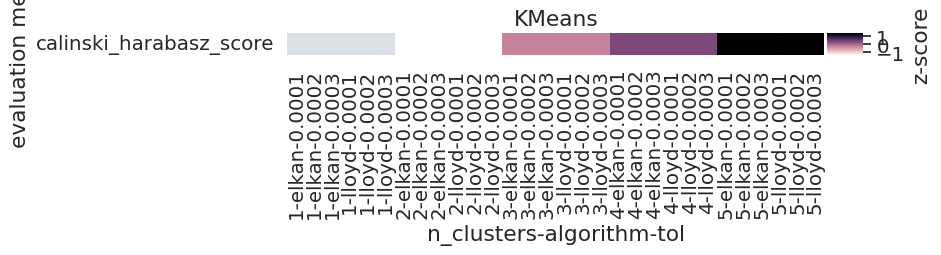

In [16]:
#Hypercluster use z-score of evaluation metrics.
#z-score = 0 means the value is equal to the mean value of all metrics
#z-score>0 is above the mean
#z-score<0 is below the mean
# hight score means better performans for algorithm with given hyperparameter
#in example 5 clusters best parameter for kmeans
clusterer.visualize_evaluations()

In [17]:
#in Multicluster, it is possible to compare algorithms explicitly. By default, all algorithms will be compared
# Hyperparameters can also be specified explicitly
clusterer = hypercluster.MultiAutoClusterer(algorithm_names=['KMeans','OPTICS'],
    algorithm_parameters={'KMeans':
                          {'n_clusters':[1,2,3,4,5],'algorithm':["lloyd","elkan"],'tol':[0.0001,0.0002,0.0003]},
                           'OPTICS':
                          {'min_samples':[5,6,7,8],'cluster_method':["xi","dbscan"],'algorithm':["ball_tree","kd_tree"]}}                  
                                           )


In [18]:
clusterer.fit(data).evaluate(
  evaluation_methods=hypercluster.constants.inherent_metrics
  )


array([<Axes: title={'center': 'KMeans'}, xlabel='n_clusters-algorithm-tol', ylabel='evaluation method'>,
       <Axes: title={'center': 'OPTICS'}, xlabel='min_samples-cluster_method-algorithm'>,
       <Axes: ylabel='z-score'>], dtype=object)

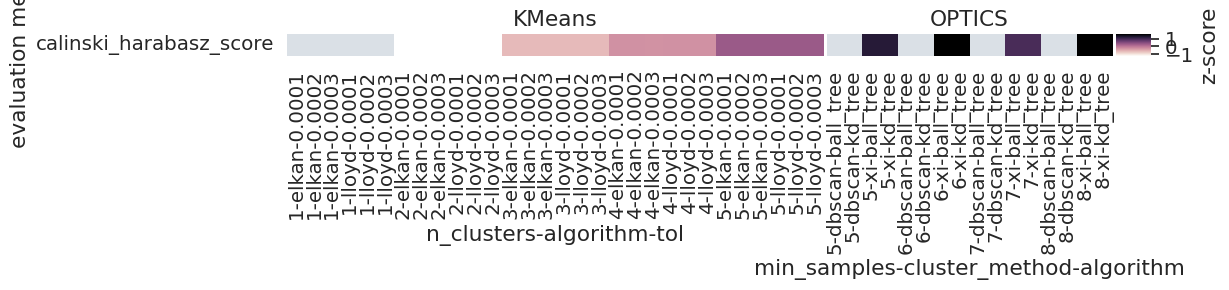

In [23]:
# In evaluation, we can see which hyperparameter and what algorithm performs better(Optics with 5 cluster)
clusterer.visualize_evaluations()

In [20]:
clusterer = hypercluster.MultiAutoClusterer(algorithm_names=['KMeans','OPTICS'],
    algorithm_parameters={'KMeans':
                          {'n_clusters':[1,2,3,4,5],'algorithm':["lloyd","elkan"],'tol':[0.0001,0.0002,0.0003]},
                           'OPTICS':
                          {'min_samples':[5,6,7,8],'cluster_method':["xi","dbscan"],'algorithm':["ball_tree","kd_tree"]}}                  
                                           )

In [24]:
clusterer.fit(data).evaluate(
  evaluation_methods=hypercluster.constants.inherent_metrics
    
  )

array([<Axes: title={'center': 'KMeans'}, xlabel='n_clusters-algorithm-tol', ylabel='evaluation method'>,
       <Axes: title={'center': 'OPTICS'}, xlabel='min_samples-cluster_method-algorithm'>,
       <Axes: ylabel='z-score'>], dtype=object)

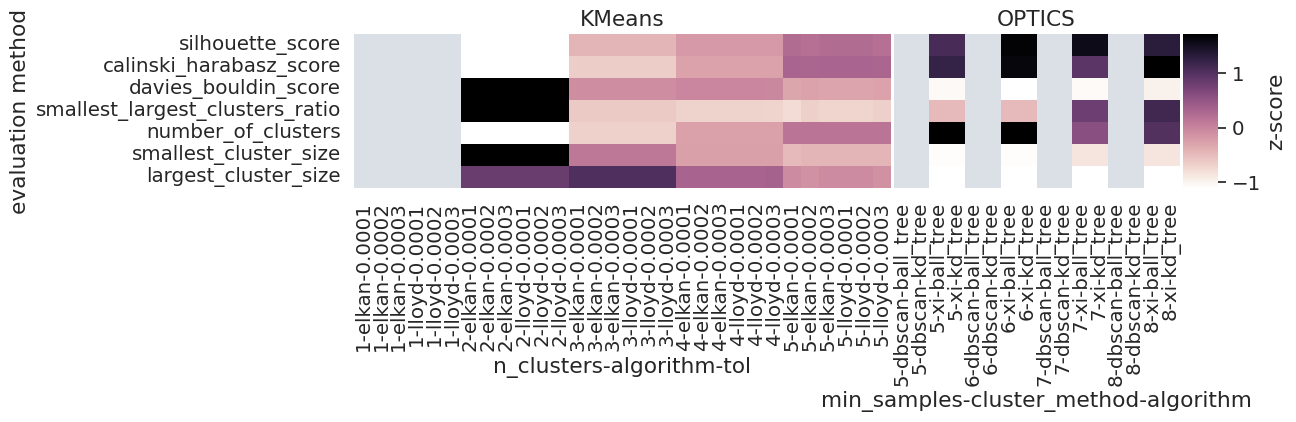

In [25]:
#visualization of different algorithms, metrics and hyperparameters. The best algorithm can be taken to make clustering with dataset.
clusterer.visualize_evaluations()